<a href="https://colab.research.google.com/github/yongguncodework/7Ecode/blob/main/7Eleven.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Technical Question (Warmup) build simple model first and plots

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to range [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Define the model architecture
model = keras.Sequential(
    [
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(10), #since MNIST has 10 classes 0 to 9
    ]
)

# Compile the model
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), # since it is more than binary 
    optimizer=keras.optimizers.Adam(lr=0.001),
    metrics=["accuracy"],
)

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2869 - accuracy: 0.9154 - val_loss: 0.1491 - val_accuracy: 0.9561
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1185 - accuracy: 0.9642 - val_loss: 0.1232 - val_accuracy: 0.9653
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0845 - accuracy: 0.9737 - val_loss: 0.1065 - val_accuracy: 0.9683
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0665 - accuracy: 0.9792 - val_loss: 0.1005 - val_accuracy: 0.9693
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0514 - accuracy: 0.9833 - val_loss: 0.0970 - val_accuracy: 0.9729
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0435 - accuracy: 0.9857 - val_loss: 0.0945 - val_accuracy: 0.9743
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0350 - accuracy: 0.9885 - val_loss: 0.1151 - val_accuracy:

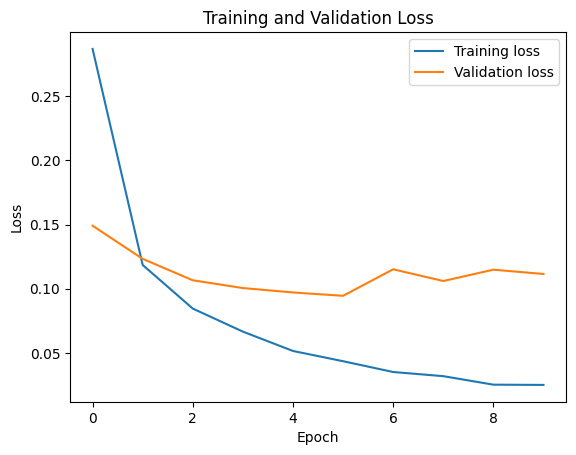

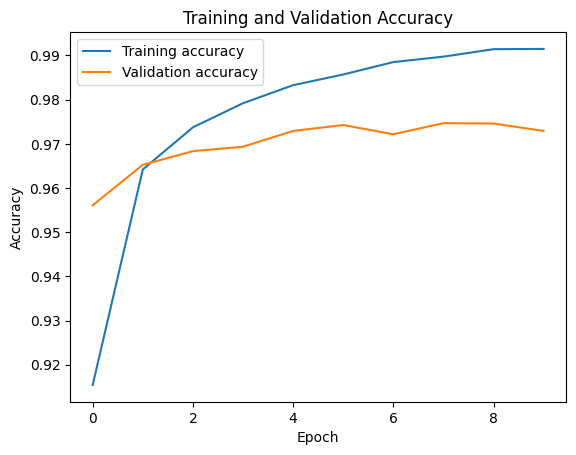

In [3]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history["accuracy"], label="Training accuracy")
plt.plot(history.history["val_accuracy"], label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [4]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


313/313 [==============================] - 0s 1ms/step - loss: 0.1086 - accuracy: 0.9734
Test accuracy: 0.9733999967575073


In [5]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


My Total number params are 111,146.
To calculate Memory foot print, it will be 111146 x 32 / 8/ 1024/ 1024
which will be 0.42MB

#Technical Question 1 (Visualization dataset and observation)

Maybe I can use PCA or t-SNE to plot for visualization.
MNIST is for hand writting recognition task based dataset.

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from tensorflow import keras

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to range [0, 1]
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Flatten the images
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

# Concatenate the training and test sets
X_all = np.concatenate([X_train_flat, X_test_flat])
y_all = np.concatenate([y_train, y_test])


In [7]:
# Next, we can use t-SNE to reduce the dimensionality of the data to 2 dimensions:
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_all)
# ugh... tsne takes long..

Finally, we can visualize the data using a scatter plot, where each point represents a digit and its color represents its label:

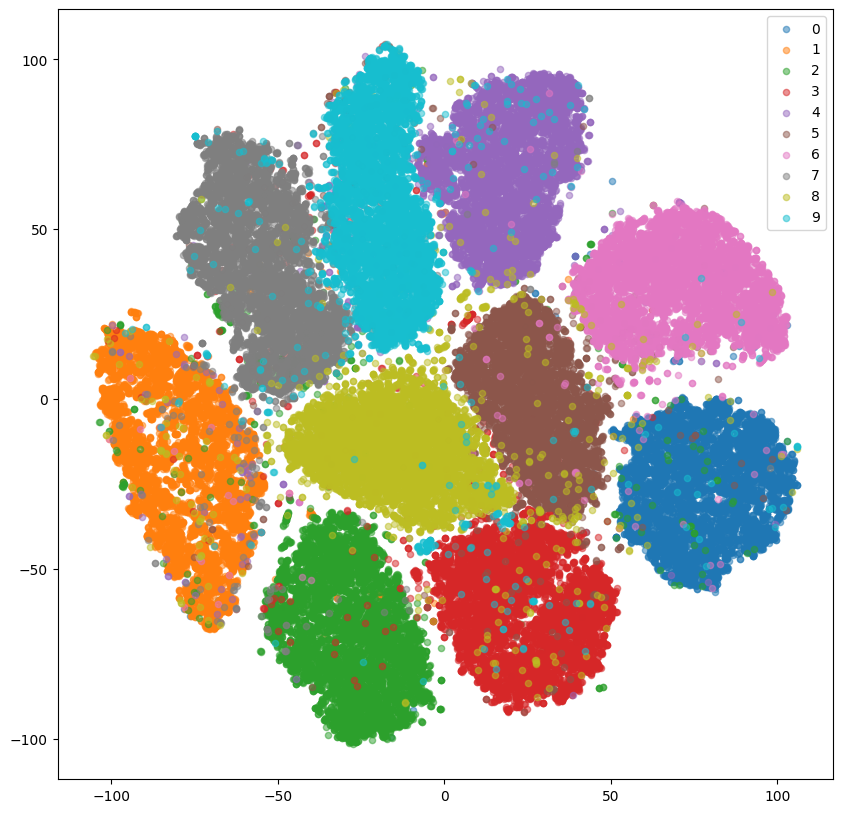

In [8]:
# Plot the t-SNE visualization
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.scatter(
        X_tsne[y_all == i, 0],
        X_tsne[y_all == i, 1],
        label=str(i),
        alpha=0.5,
        s=20
    )
plt.legend()
plt.show()


The resulting plot shows the MNIST digits in 2D space, with similar digits (e.g., 0, 6, and 8 are close or overlap for some) appearing close to each other. We can also see some outliers and overlapping regions, indicating that some digits are harder to distinguish than others.

313/313 [==============================] - 1s 2ms/step


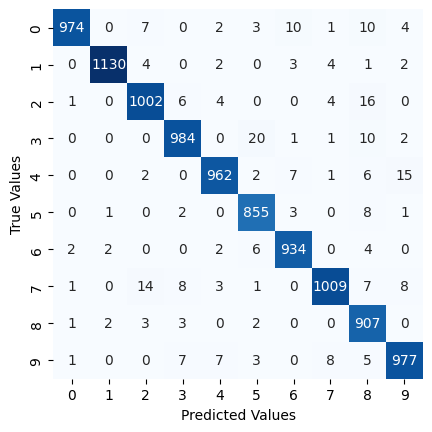

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the labels of the test set
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion matrix
sns.heatmap(cm.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

The output of this code will print the confusion matrix, which shows the number of true positives, false

#Technical Question 2 (Bulkier model)

To make it bulkier with more layers, we can add convolutional layers and batch normalization layers to improve the stability and ocnvergence of the model

In [15]:
from tensorflow.keras import layers, models

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model on the MNIST dataset
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 160s 84ms/step - loss: 0.1659 - accuracy: 0.9496 - val_loss: 0.0456 - val_accuracy: 0.9848
Epoch 2/10
1875/1875 [==============================] - 157s 83ms/step - loss: 0.0724 - accuracy: 0.9779 - val_loss: 0.0277 - val_accuracy: 0.9913
Epoch 3/10
1875/1875 [==============================] - 156s 83ms/step - loss: 0.0577 - accuracy: 0.9827 - val_loss: 0.0238 - val_accuracy: 0.9924
Epoch 4/10
1875/1875 [==============================] - 163s 87ms/step - loss: 0.0499 - accuracy: 0.9852 - val_loss: 0.0235 - val_accuracy: 0.9918
Epoch 5/10
1875/1875 [==============================] - 164s 88ms/step - loss: 0.0420 - accuracy: 0.9875 - val_loss: 0.0220 - val_accuracy: 0.9926
Epoch 6/10
1875/1875 [==============================] - 160s 85ms/step - loss: 0.0379 - accuracy: 0.9880 - val_loss: 0.0270 - val_accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 159s 85ms/step - loss: 0.0343 - accuracy: 0.9897 - val_loss: 0

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


313/313 [==============================] - 6s 20ms/step - loss: 0.0192 - accuracy: 0.9937
Test accuracy: 0.9937000274658203


In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 26, 26, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 24, 24, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                      

Test accuracy is 99.37% which is more than 98% above goal.

#Technical Question 3 (Removing Layers)

In [18]:
from tensorflow.keras import layers, models

# Define the model architecture
model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model on the MNIST dataset
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.3216 - accuracy: 0.9006 - val_loss: 0.0692 - val_accuracy: 0.9773
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1291 - accuracy: 0.9609 - val_loss: 0.0441 - val_accuracy: 0.9855
Epoch 3/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0992 - accuracy: 0.9699 - val_loss: 0.0383 - val_accuracy: 0.9881
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0853 - accuracy: 0.9737 - val_loss: 0.0362 - val_accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0765 - accuracy: 0.9771 - val_loss: 0.0367 - val_accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0707 - accuracy: 0.9786 - val_loss: 0.0298 - val_accuracy: 0.9899
Epoch 7/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0657 - accuracy: 0.9801 - val_loss: 0.0281 -

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test)
model.summary()

313/313 [==============================] - 2s 6ms/step - loss: 0.0227 - accuracy: 0.9927
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 16)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                               

# Technical Question (Bonus)

In [21]:
#I am going to work on the last (removed layers model)
# TO do the bonus part, I will reshape the input shape to visualizing conviniently.
# now using Keras Sequntial

x_train_redu = np.expand_dims(X_train, axis=-1)
x_test_redu = np.expand_dims(X_test, axis=-1)

# Define the model architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train_redu, y_train, epochs=5, validation_data=(x_test_redu, y_test))

Epoch 1/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1466 - accuracy: 0.9550 - val_loss: 0.0461 - val_accuracy: 0.9840
Epoch 2/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0343 - val_accuracy: 0.9896
Epoch 3/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0328 - accuracy: 0.9900 - val_loss: 0.0320 - val_accuracy: 0.9903
Epoch 4/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0252 - accuracy: 0.9921 - val_loss: 0.0254 - val_accuracy: 0.9920
Epoch 5/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0207 - accuracy: 0.9936 - val_loss: 0.0321 - val_accuracy: 0.9893


In [22]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 576)              

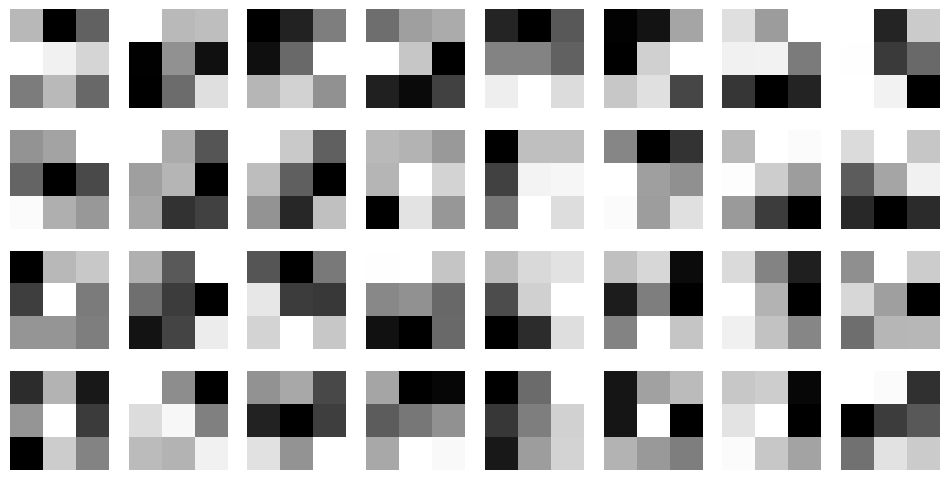

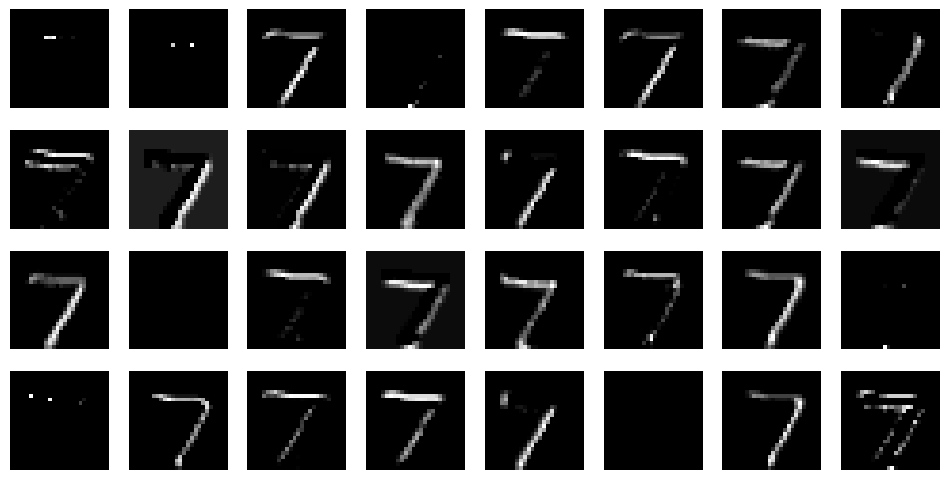

In [24]:
# Get the filters from the first convolutional layer
filters, biases = model.layers[0].get_weights()

# Normalize the filters
filters = (filters - np.min(filters)) / (np.max(filters) - np.min(filters))

# Visualize the filters
n_filters = filters.shape[3]
fig, ax = plt.subplots(4, 8, figsize=(12, 6))
for i in range(n_filters):
    row = i // 8
    col = i % 8
    ax[row, col].imshow(filters[:, :, 0, i], cmap='gray')
    ax[row, col].axis('off')
plt.show()

# Define a function to get the feature maps from the first convolutional layer
get_feature_maps = keras.backend.function([model.layers[0].input], [model.layers[0].output])

# Get the feature maps for the first image in the test set
feature_maps = get_feature_maps([np.expand_dims(x_test_redu[0], axis=0)])[0]

# Visualize the feature maps
n_feature_maps = feature_maps.shape[3]
fig, ax = plt.subplots(4, 8, figsize=(12, 6))
for i in range(n_feature_maps):
    row = i // 8
    col = i % 8
    ax[row, col].imshow(feature_maps[0, :, :, i], cmap='gray')
    ax[row, col].axis('off')
plt.show()